In [1]:
import matplotlib.pyplot as plt
#загружаем нужные библиотеки
Image = plt.imread("C:/Users/dimap/source/repos/Filters/ordos.png")
Grad = plt.imread("C:/Users/dimap/source/repos/Filters/ordos.png")
#адрес картинки "F:/test.png"
#Загружаем изображение в память приложения
def ShowImage(Image):
    fig, p = plt.subplots()
    p = plt.imshow(Image)
    plt.show()
#Функция необходимая для вывода изображения на экран
def scale_plot_size(factor=1.5):
    import matplotlib as mpl
    default_dpi = mpl.rcParamsDefault['figure.dpi']
    mpl.rcParams['figure.dpi'] = default_dpi*factor

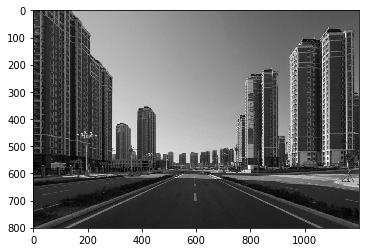

In [2]:
for i in range(len(Image)):
    for j in range(len(Image[0])):
        R = Image[i][j][0]
        G = Image[i][j][1]
        B = Image[i][j][2]
        C = R*0.03 + G*0.23 + B*0.74
        Image[i][j][0] = C
        Image[i][j][1] = C
        Image[i][j][2] = C
ShowImage(Image)
scale_plot_size()
#В этом блоке мы делаем изображение черно-белым 

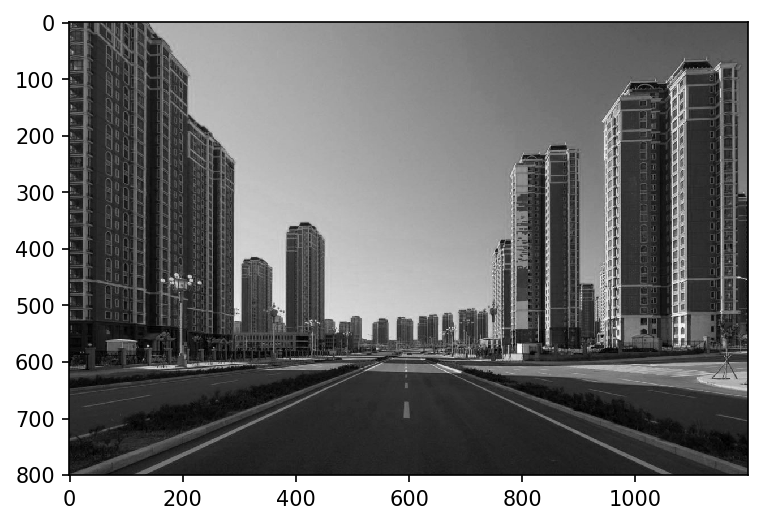

In [3]:
ShowImage(Image)

In [4]:
from math import sqrt
import numpy as np
def Gradient(Image,dx,dy,HightGradient):
    for i in range(len(Image) - 1 ):
        for j in range(len(Image[0]) - 1):
            dx[i][j]=(Image[i][j][0] + Image[i+1][j][0] - Image[i+1][j+1][0] -Image[i][j+1][0])/4
            dy[i][j]=(Image[i][j][0] -Image[i+1][j][0] - Image[i+1][j+1][0] +Image[i][j+1][0])/4
    Lx =L(dx)
    Ly =L(dy)
    for i in range(len(Image) - 2 ):
        for j in range(len(Image[0]) - 2):
            dx[i][j] = Lx[i][j]
            dx[i][j] = Lx[i][j]
            Grad[i][j][0] = sqrt(dx[i][j]**2 + dy[i][j]**2)/4
            Grad[i][j][1] = Grad[i][j][0]
            Grad[i][j][2] = Grad[i][j][0]
    
            
            
    temp = 0       
    for i in range(len(Image) -1 ):
        for j in range(len(Image[0]) - 1):
            temp+=Grad[i][j][0]*100
    temp = temp/((len(Image[0]) -1)*(len(Image) - 1))
    for i in range(len(Image) -1 ):
        for j in range(len(Image[0]) - 1):
            if 100*Grad[i][j][0] > 3*temp :
                Grad[i][j][0] = 1
                Grad[i][j][1] = 1
                Grad[i][j][2] = 1
                HightGradient.append((i,j))
            else:
                Grad[i][j][0] = 0
                Grad[i][j][1] = 0
                Grad[i][j][2] = 0
            
            
    return Grad
def L(dxory):
    result = np.zeros((dxory.shape[0]-1,dxory.shape[1]-1))
    for i in range(dxory.shape[0] -1 ):
        for j in range(dxory.shape[1] - 1):
            result[i][j]=(dxory[i][j] + dxory[i+1][j] + dxory[i+1][j+1] +dxory[i][j+1])/4
    return result
# Получаем матрицу модулей векторов градиентов в точке на изображении( дискретная первая производная) 
    

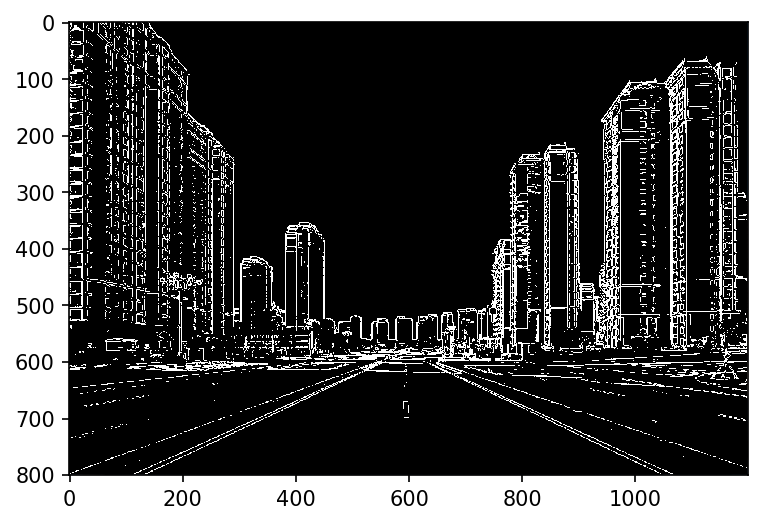

In [5]:
dx= np.zeros((len(Image) - 1,len(Image[0]) - 1 ))
dy= np.zeros((len(Image) - 1,len(Image[0]) - 1 )) 
HightGradient=[]
Grad = Gradient(Image,dx,dy,HightGradient)
ShowImage(Grad)


In [6]:
A=[]
B=[]
C=[]
dot=[]
for elem in HightGradient:
    A.append(-dy[elem[0]][elem[1]])
    B.append(dx[elem[0]][elem[1]])
    C.append(-elem[1]*dx[elem[0]][elem[1]] + elem[0]*dy[elem[0]][elem[1]] )
    dot.append((elem[0],elem[1]))
    

In [7]:
import math
def draw_line(Summator, x1=0, y1=0, x2=0, y2=0):
        dx = x2 - x1
        dy = y2 - y1
        sign_x = 1 if dx>0 else -1 if dx<0 else 0
        sign_y = 1 if dy>0 else -1 if dy<0 else 0
        if dx < 0: dx = -dx
        if dy < 0: dy = -dy
        if dx > dy:
            pdx, pdy = sign_x, 0
            es, el = dy, dx
        else:
            pdx, pdy = 0, sign_y
            es, el = dx, dy
        
        x, y = x1, y1
        
        error, t = el/2, 0  
        var_1,var_2 = Summator.shape[0],Summator.shape[1] 
        if x >= 0 and x < var_1 and y >= 0 and y < var_2:
            Summator[x][y] +=1 
        while t < el:
            error -= es
            if error < 0:
                error += el
                x += sign_x
                y += sign_y
            else:
                x += pdx
                y += pdy
            t += 1
            if x >= 0 and x < var_1 and y >= 0 and y < var_2:
                Summator[x][y] +=1  
Summator = np.zeros((len(Image) -1,len(Image[0]) -1))
counter = 0
for i in range(len(A)):
    if B[i] != 0  and A[i]!=0: 
        counter+=1;
        x1 = dot[i][0]
        y1 = dot[i][1]
        x2 = dot[i][0]
        y2 = dot[i][1]
        q,p = A[i]/sqrt(A[i]**2 + B[i]**2) , B[i]/sqrt(A[i]**2 + B[i]**2) 
        #q,p = -A[i]/B[i],1
        while x1 >= 0 and x1 <= Summator.shape[0] and y1 >= 0 and y1 <= Summator.shape[1]:
            x1+=10*p
            y1+=10*q
        while x2 >= 0 and x2 <= Summator.shape[0] and y2 >= 0 and y2 <= Summator.shape[1]:  
            x2-=10*p
            y2-=10*q
            
        draw_line(Summator,int(x1),int(y1),int(x2),int(y2))
        if counter == 100:
                print((p,q))
                print(int(x1),int(y1),int(x2),int(y2))
                counter = 0

(-0.997773337464529, -0.06669607968160704)
-6 23 801 77
(-0.9997666169405907, 0.0216035101584479)
-3 25 805 7
(-0.9440347256224932, -0.32984608049644)
0 99 801 380
(-0.08808579410318094, -0.9961128916328771)
9 -9 116 1205
(0.9994198072311835, 0.03405949080629215)
803 162 -5 135
(-0.9735896809920876, 0.22830491248706195)
-1 29 125 0
(0.6933978371820464, 0.7205549523743906)
805 870 -5 27
(0.9985412643651276, -0.053993919658536275)
803 77 -4 121
(0.029348728134298296, -0.999569233298474)
32 -9 0 1109
(0.9807361893890262, 0.19533695713482402)
806 187 -7 25
(0.3758939464941431, 0.9266626899735729)
471 1200 -2 33
(-0.6788724736121138, -0.7342561981841011)
-2 128 805 1002
(0.9998013925303737, 0.019929262262451012)
800 151 -8 135
(-0.9913713259949588, 0.13108353823038627)
-3 165 809 58
(0.9998051483180126, -0.019739944194367927)
809 104 -9 121
(0.9999728937892998, 0.007362858592554134)
804 81 -4 75
(0.09540400575606287, 0.9954386348166807)
171 1201 56 -2
(0.7343811696277736, 0.6787372817932895

(0.9788951722142367, -0.20436301479391975)
224 -2 0 44
(0.9870937228952686, 0.16014362997246756)
808 161 -1 29
(0.999387180368305, 0.035003767161395576)
806 52 -2 24
(-0.9998284974104047, -0.018519604910809947)
-2 1165 806 1180
(-0.1569624979773652, -0.9876045636937416)
62 -8 255 1206
(-0.7030772356571768, -0.711113493544218)
-5 739 451 1201
(0.9990898994124421, -0.0426541075634744)
809 933 -9 968
(-0.535328603033779, 0.8446438816293541)
65 1199 804 34
(-0.984206106245155, -0.17702638342843346)
-4 911 802 1056
(-0.090970633647716, -0.9958535754887528)
141 -6 252 1208
(-0.24477480218751546, 0.9695799586491373)
-1 1128 285 -6
(-0.8087177807989661, -0.588196864170148)
63 -4 807 536
(0.9912059346446157, -0.13232836100131348)
809 987 -2 1096
(-0.7882078510696758, -0.6154091188080688)
-2 778 541 1203
(0.9976301668185197, 0.06880443484000624)
805 919 -2 864
(0.033734797409137186, -0.9994308197387973)
257 -3 216 1205
(0.7948879717820072, 0.6067562214895591)
801 658 -1 46
(-0.7331173769839443, 

(-0.9993643134984164, -0.03565065084733896)
0 937 808 966
(0.9301376615592841, -0.3672110163775409)
804 708 -4 1028
(-0.9996362453076486, 0.026969928943672637)
-8 789 800 767
(0.9714802594060263, -0.23712044531081625)
808 129 -8 328
(0.3033624903102568, 0.9528752276519521)
703 1202 317 -7
(-0.6937673293064582, 0.7201992035450916)
215 1203 804 591
(-0.9872337818989613, -0.15927793280135905)
-1 846 807 977
(-0.9972460975656253, 0.07416347409696597)
-4 906 803 846
(-0.21322397283604716, 0.977003345648321)
124 1202 389 -9
(0.025825371820576253, 0.9996664694638552)
362 1205 330 -3
(-0.9769867006314356, 0.2133002268852558)
-3 248 806 71
(0.29532532229299213, 0.9553967521467406)
663 1205 288 -7
(0.9962214562207712, 0.08684935328122044)
808 105 -8 34
(0.9995480498517559, 0.030061537511438186)
809 1191 -9 1166
(0.9998604898799677, 0.01670331634709375)
800 1098 -8 1085
(-0.7702502928017297, -0.6377417082478216)
-4 681 626 1203
(-0.9167811978255749, 0.399389828755696)
-5 938 801 587
(-0.989158361

(-0.24528399893923925, -0.9694512674004688)
341 -3 647 1208
(-0.26913252207341726, 0.9631031541649117)
397 1206 736 -7
(0.5482476441954207, 0.836316041119726)
723 1200 0 96
(0.015798317105859896, -0.9998751988006418)
434 -4 415 1204
(0.6236583374234899, -0.7816970501173511)
801 341 115 1201
(-0.999906539337278, -0.013671597951534897)
-4 244 804 256
(-0.8142701242797581, 0.580486145145108)
109 1199 801 705
(0.9997851536729497, 0.020727915842076075)
805 769 -3 752
(0.7766540420661713, 0.6299273759270015)
802 298 429 -4
(0.9600211744595203, -0.2799273916381947)
801 836 -4 1071
(0.9979602232978337, 0.0638388025838338)
807 446 -1 394
(-0.978547800579717, -0.20601990675805654)
331 0 801 98
(-0.14287144644748942, 0.9897412539598429)
403 1201 577 -6
(-0.9977531761433318, 0.0669970110967154)
-8 785 809 730
(0.38817079734375953, -0.9215874522200864)
483 -5 -1 1146
(-0.984651094589417, -0.17453430013571258)
-2 986 805 1129
(0.9999443893049552, 0.010546008607054297)
801 770 -7 762
(-0.134451182755

(-0.6168311145627081, 0.7870955317541367)
317 1200 805 579
(0.9982370044661736, -0.05935387868034098)
809 257 -9 305
(0.1038845823633367, -0.9945893592569726)
596 -7 469 1205
(-0.995967131265546, -0.08971885776512507)
-7 1151 529 1199
(0.14029487895896237, -0.9901097650957141)
614 -8 443 1199
(0.21461085739405314, 0.9766996364740745)
536 1206 270 -4
(-0.2898046567635629, -0.9570858169036638)
433 -8 801 1207
(-0.9915354751226237, 0.12983605652264957)
-3 846 809 740
(-0.9965208069078929, -0.08334435433574411)
-5 150 801 218
(-0.5981437872329656, -0.8013888006421133)
-1 123 800 1197
(0.9997626615112436, -0.02178579004660196)
803 169 -5 187
(-0.9367845993395861, 0.3499065795897116)
-1 979 804 678
(-0.40338607478453387, -0.9150298763810538)
393 -3 801 920
(-0.9197994770192078, 0.3923887384663221)
0 1062 800 721
(-0.9967454377251727, 0.08061347513942085)
-2 41 525 0
(-0.09882140491666491, -0.9951051853599682)
450 -9 571 1204
(-0.10842446436573605, 0.9941046904260151)
501 1201 633 -1
(-0.4443

(0.9779404142243479, 0.20888404971828506)
807 816 -3 642
(0.17037680200757235, 0.9853789856383546)
584 1206 375 -5
(0.15748022031524295, 0.9875221416299802)
655 1204 463 0
(0.7744010981553703, -0.6326949811526537)
806 770 279 1200
(0.1428862449580047, -0.9897391176475755)
589 -4 414 1202
(-0.5218893521077498, -0.8530131910800401)
340 0 804 758
(0.39446379593909797, 0.9189114830566204)
795 1205 275 -7
(0.8863895152648881, 0.46294019832854977)
805 1084 -1 663
(-0.7496686342940033, -0.6618133715450026)
283 -5 800 451
(0.9878320680693227, -0.1555242916520924)
803 609 -6 736
(0.31023089482055016, 0.9506612392954921)
681 1207 287 0
(0.8629250439791601, -0.5053319389011194)
800 988 437 1200
(-0.12039005088040178, 0.9927266671390541)
503 1205 650 -5
(-0.7125825633891172, -0.701588262696715)
0 284 805 1077
(-0.230166879229648, -0.9731511741274758)
312 -2 597 1204
(-0.12096827545824113, 0.9926563737430286)
476 1202 623 -8
(0.6934686473280982, -0.7204868043017428)
806 465 99 1200
(-0.112371632370

(0.8740140270703182, -0.4859006899401616)
803 1036 506 1202
(-0.03230611638416868, -0.9994780211911478)
591 -6 630 1202
(-0.17971782069499279, 0.9837182040221898)
627 1203 801 249
(-0.12309975666781477, 0.9923943016303172)
500 1199 649 -1
(-0.05498345141105982, -0.9984872658531643)
579 -4 645 1203
(0.0375529420315208, -0.9992946395056752)
642 -1 597 1207
(0.17471495420911043, 0.9846190556635133)
717 1205 502 -5
(0.05525187242006633, 0.9984724485903839)
647 1201 580 -6
(0.010082919460084234, 0.9999491660755369)
640 1204 628 -4
(-0.051220858987127055, -0.9986873502776636)
588 -3 650 1204
(-0.016090685038401255, -0.9998705365471047)
624 -7 644 1201
(-0.002582884057002705, -0.9999966643494108)
639 0 642 1208
(-0.07322105213697006, 0.9973157361257041)
557 1200 646 -5
(-0.09428094469694018, -0.995545631032075)
543 -5 657 1199
(0.3952174504516416, 0.9185875934599292)
801 1093 326 -9
(-0.334871440044267, 0.9422638264534403)
377 1208 803 11
(-0.03208426842749642, 0.9994851673333989)
613 1207 65

In [8]:
max_1=1
for i in range(Summator.shape[0]):
    for j in range(Summator.shape[1]):
        if Summator[i][j] > max_1 :
             max_1 = Summator[i][j]

mx = []
for k in range(10):
    max_1 = (0,0,0)
    for i in range(Summator.shape[0]):
        for j in range(Summator.shape[1]):
            if Summator[i][j] > max[2] :
                max_1 = (i,j,Summator[i][j])
    mx.append(max_1)
    Summator[max_1[0],max_1[1]] = 0

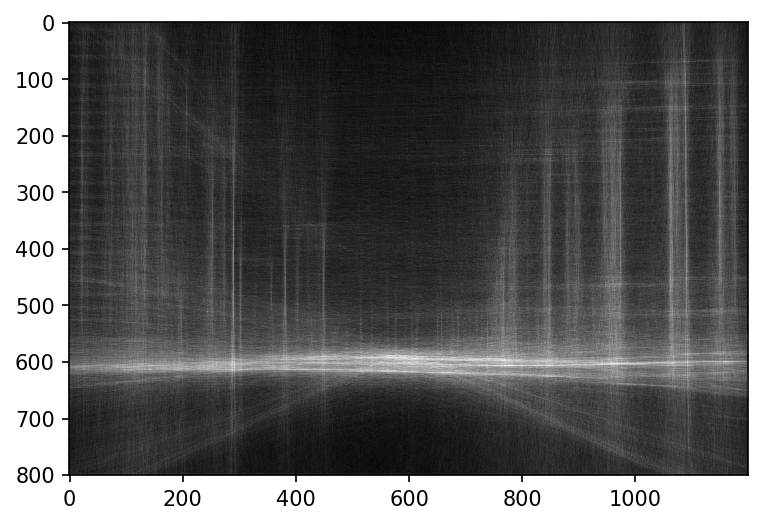

In [9]:

for i in range(len(Grad) -1):
    for j in range(len(Grad[0]) -1):
            Grad[i][j][0] = Summator[i][j]/(max_1)
            Grad[i][j][1] = Summator[i][j]/(max_1)
            Grad[i][j][2] = Summator[i][j]/(max_1)
ShowImage(Grad)

In [10]:
def lineardescribe(data,str1,str2):
    X=[]
    temp1= data[str1]
    temp2= data[str2]
    for i in temp1:
        X.append(i -data[str1].mean())
        Y=[]
    for i in temp2:
        Y.append(i -data[str2].mean())   
    from sklearn.linear_model import LinearRegression
    Xx= np.array(X).reshape(len(X),1)
    Yy=np.array(Y)
    model = LinearRegression().fit(Xx,Yy)
    r_sq = model.score(Xx, Yy) 
    print("Regression of : " +str1 + " " + str2 )
    print('r_sq:' + str(r_sq))
    print('intercept:', model.intercept_)
    print('slope:', model.coef_)
    return model